<a href="https://colab.research.google.com/github/xtric6/Winter-2022-Data-Science-Intern-Challenge-/blob/main/Copy_of_ShopifyDatascienceChallenge2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Winter 2022 Data Science Intern Challenge 


###QUESTION 1

This notebook shows the analysis of data from 100 shopify sneaker stores which recorded a total Average order return(AOV) of $3145.13. 
This AOV is high for a relatively affordable item like sneakers.
The code in this notebook aims to answer the following questions.

1. Detecting what could be wrong with the calculation. Figuring a better way to evaluate the data. 
2. Best metric to report for the dataset?
3. value of the metric in question 2?



###QUESTION 2

The end part of this notebook contains sql queries aimed at answering some questions given a database of shopify store containing the following tables: 

**Customers**: contains customers details.

**Categories** : Shows the details of the category of products and their description.

**Employees**: This table shows employee details.

**Orders** : Shows the details of all orders made.

**OrderDetails** : Shows more detailed information of orders made including the 
quantity of the orders made.

**Products** : Shows details of the wide variety of products being sold.

**Shippers**: Shows details of companies in charge of shipping products to 
customers.

**Suppliers** : Shows the details of the suppliers of their products.

###Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv to 2019 Winter Data Science Intern Challenge Data Set - Sheet1 (1).csv


Saving a copy of the imported file in a variable


###Importing the libraries

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
shopifydataCopy = shopifydata = pd.read_csv(io.BytesIO(uploaded['2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv']))

In [ ]:
shopifydata = pd.read_csv(io.BytesIO(uploaded['2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv']))

###Inspecting the dataset

In [ ]:
shopifydata.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
shopifydata.shape

(5000, 7)

######The dataset contains 5000 rows and 7 columns

In [ ]:
print(shopifydata[shopifydata.duplicated()])

Empty DataFrame
Columns: [order_id, shop_id, user_id, order_amount, total_items, payment_method, created_at]
Index: []


This codes output shows that there are no duplicated rows or sale in this dataset.

In [ ]:
shopifydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
shopifydata.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

######This shows that there are no missing values in the dataset

In [ ]:
shopifydata.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


we can already see some outliers from this.
The max order amount of 704,000 is too high compared to median order amount by a customer of 284.Also
a single purchase of 2000 snaekers is being recorded in the total_items
columns.
Although this customer might be a retailer but the fact that this purchases were paid for with a credit card makes this purchases a possible fraudulent activity.


Lets investigate this further

In [ ]:
outlier1 = shopifydata.loc[shopifydata['order_amount']== 704000]
outlier1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [ ]:
#checking all ids responsible for this purchase
outlier1['user_id'].unique()

array([607])

In [ ]:
len(outlier1)


17

In [ ]:
print('Total amount spent on sneakers in a month by customer with id 607: {}'.format(outlier1['order_amount'].sum()))
print('Total number of sneakers purchased by customer with id 607 in a month: {}'.format(outlier1['total_items'].sum()))



Total amount spent on sneakers in a month by customer with id 607: 11968000
Total number of sneakers purchased by customer with id 607 in a month: 34000


####dropping the detected outlier

In [ ]:
#dropping the detected outlier
shopifydata = shopifydata.drop(shopifydata[shopifydata['order_amount']== 704000].index)

###Checking outliers using Scatter plot

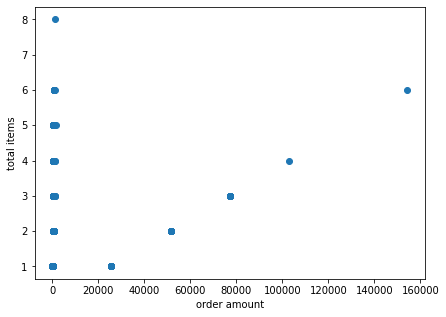

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(shopifydata['order_amount'],shopifydata['total_items'])
ax.set_xlabel('order amount')
ax.set_ylabel('total items')
plt.show()


The scatter plot shows more outliers.There are two classes of customers here,the ones that spent way less than $20000 and those that spent over this amount.

lets dive deeper by investigating the customers that made this usual purcahses. 

###Investigating customers that made purchases over $20,000

In [ ]:
outliers2 = shopifydata.loc[shopifydata['order_amount'] > 20000]
outliers2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


In [ ]:
no_of_unique = outliers2['user_id'].unique()
no_of_unique

array([990, 936, 983, 967, 760, 878, 800, 944, 970, 775, 867, 912, 812,
       810, 855, 709, 834, 707, 935, 861, 915, 962, 890, 869, 814, 817,
       740, 910, 745, 927, 928, 982, 828, 766, 889, 852, 946, 787, 960,
       756, 969, 866, 997, 818, 823])

In [ ]:
no_of_unique.shape

(45,)

45 purchases were over $20,000 dollars.

In [ ]:
ShopID_OrderAmountOver2000 = len(pd.unique(outliers2['shop_id']))
  
print("No.of.unique values :",ShopID_OrderAmountOver2000)


No.of.unique values : 1


Most single sneakers sale in this shop with id 78 cost over $20,000,except this store is a high end store that sells
high end sneakers the order amount of snakers sold here is outrageous for a single store.

lets calculate the total amount generated by this store compared to other stores.

<Figure size 864x432 with 0 Axes>

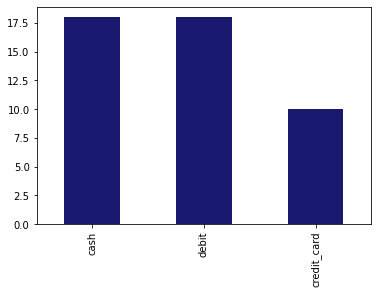

<Figure size 864x432 with 0 Axes>

In [ ]:
outliers2['payment_method'].value_counts().plot(kind = 'bar', color = 'midnightblue')
plt.figure(figsize = (12,6))

From the bar plot above there seems to be a balance in the payment methods by customers spending above $20,000.

###Dropping the newly discovered outlier

In [ ]:
shopifydata = shopifydata.drop(shopifydata.loc[shopifydata['order_amount'] > 20000].index)

In [ ]:
shopifydata.shape

(4937, 7)

###AVERAGE ORDER VALUE after outliers have been removed.

Average order value (AOV) is an e-commerce metric that tracks the average dollar amount spent whenever a customer places an order on a website or application. AOV is considered one of the most important metrics in the e-commerce industry.

AOV is calcualted by diving the revenue by the no of orders made
AOV = Revenue/total no. of orders made


our revenue in this dataset is sum of total amount spent and no of orders can be calcualted by 

In [ ]:
#AOV = Revenue/total no. of orders made

AOV = sum(shopifydata['order_amount'])/len(shopifydata['order_id'])
AOV

302.58051448247926

In [ ]:
#Confirming if outliers have truly been dropped
len(shopifydata['order_id'])

4937

In [ ]:
shopifydata['order_amount'].median()

284.0

Total revenue generated within 30days

In [ ]:
total_revenue_with_outliers = sum(shopifydataCopy['order_amount'])
total_revenue_with_outliers

15725640

Total revenue generated with outlier is $15,725,640

In [ ]:
revenue_id67 = outlier1['order_amount'].sum()
revenue_id67

11968000

In [ ]:
#percentage of revenue generated by customer with id 67
(revenue_id67/total_revenue_with_outliers)*100

76.10501067047191

Customer with id 67 generated about 76% of the total revenue of initially calculated revenue

In [ ]:
revenue_45customers = outliers2['order_amount'].sum()
revenue_45customers

2263800

In [ ]:
#percentage of revenue generated by customer with id 67
(revenue_45customers/total_revenue_with_outliers)*100

14.39559852571978

In [ ]:
total_revenue_of_outliers = revenue_45customers + revenue_id67
total_revenue_of_outliers
(total_revenue_of_outliers/total_revenue_with_outliers)*100

90.50060919619169

#CONCLUSION





#QUESTION 1

Answers to questions

1. The unsual high value of AOV which was calculated to be 3145.13 dollars 
was a result of numerous outliers in the data which are:

a.   Customer with customer id 67 spent 11,968,000 dollars on 37,000 sneakers in less than a month and another group of forty five customers made purcahses of over 20,000 dollars individually in the space of 30 days.

This spend is approximately 90.5% of the total revenue generated within the 30days window. The high amount of revenue generated by this forty six customers in total greatly influenced the AOV.
A better way to evaluate the data is by removing all the purchases made by this customers and re-evaluating the AOV of the data. When outliers have been removed the calculated AOV becomes approximately 302.6 dollars. The median of this dataset  is 284 dollars and median are usually not affected by outliers

b.   The best metric to be used in cases like this with outliers is the median value,also because the median value is not very far from the calculated AOV without outliers.

c. 284 dollars.

#QUESTION 2



```

```

The SQL queries below seeks to answer the following questions:

a. How many orders were shipped by Speedy Express in total?

b. What is the last name of the employee with the most orders?

c. What product was ordered the most by customers in Germany?


**a. How many orders were shipped by Speedy Express in total?**

In [ ]:
SELECT 
    COUNT(o.orderid) AS 'Number of orders shipped with Speedy Express'
FROM
    orders o
        JOIN
    shippers s ON o.shipperID = s.shipperID
WHERE
    s.shipperName = 'Speedy Express';

Answer:  

####**54**

**b. What is the last name of the employee with the most orders?**

In [ ]:
SELECT 
    e.lastname,
    COUNT(orders.orderid) AS 'Employee with the most orders'
FROM
    employees e
        JOIN
    orders o ON e.employeeid = o.employeeid
GROUP BY e.lastName
ORDER BY COUNT(o.orderid) DESC
LIMIT 1;

Answer: 

####**Peacock**

**c. What product was ordered the most by customers in Germany?**


In [ ]:
SELECT 
    p.productname, SUM(od.quantity) AS TotalOrdered
FROM
    orderdetails od
        JOIN
    products p ON od.productid = p.productid
        JOIN
    orders o ON od.orderid = o.orderid
        JOIN
    customers AS c ON o.customerid = c.customerid
WHERE
    c.country = 'Germany'
GROUP BY p.productname
ORDER BY TotalOrdered DESC
LIMIT 1;

Answer:

####**Boston Crab Meat**